<a href="https://colab.research.google.com/github/Carolinadmz/Portafolio/blob/main/Ejercicios/250306_MNIST_KERAS_CON2D_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical


In [2]:
#importar datos de entrada
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


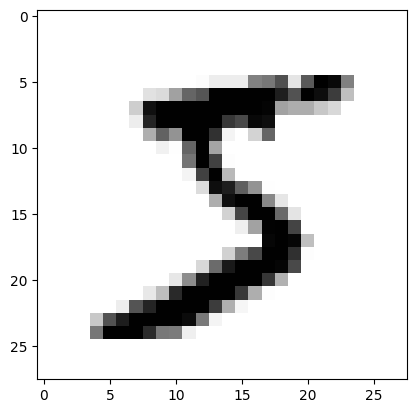

In [3]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [4]:
#normalizar
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
#Ajustar el tamaño de los datos (estructura) para incluir el canal del color
#Incluso aunque sea en escala de grises, ya que lo requiere las capas Conv2D
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_test.shape

(10000, 28, 28, 1)

In [9]:
#colocar etiquetas en OH
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [11]:
model = Sequential() #modelo tipo secuencail
model.add(Conv2D(16, (5,5), activation='relu', input_shape=(28,28,1)))# primer capa con convonloción, 28,28,1, tamaño y el canal, 5,5: tamaño del kernel, 16 es el numero de filtros
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))#agregar capa del valor más grande, hace un  muestreo de la imagen y se lleva lo más importante, strides es como vaas a ir avanzando
model.add(Flatten())#aplanar los valores
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))

Epoch 1/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8988 - loss: 0.3303 - val_accuracy: 0.9807 - val_loss: 0.0631
Epoch 2/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9827 - loss: 0.0575 - val_accuracy: 0.9865 - val_loss: 0.0396
Epoch 3/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9898 - loss: 0.0349 - val_accuracy: 0.9865 - val_loss: 0.0376
Epoch 4/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9918 - loss: 0.0279 - val_accuracy: 0.9864 - val_loss: 0.0423
Epoch 5/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9941 - loss: 0.0181 - val_accuracy: 0.9848 - val_loss: 0.0464
Epoch 6/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9962 - loss: 0.0121 - val_accuracy: 0.9898 - val_loss: 0.0355
Epoch 7/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9961 - loss: 0.0112 - val_accuracy: 0.9877 - val_loss: 0.0393
Epoch 8/300
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9970 - loss

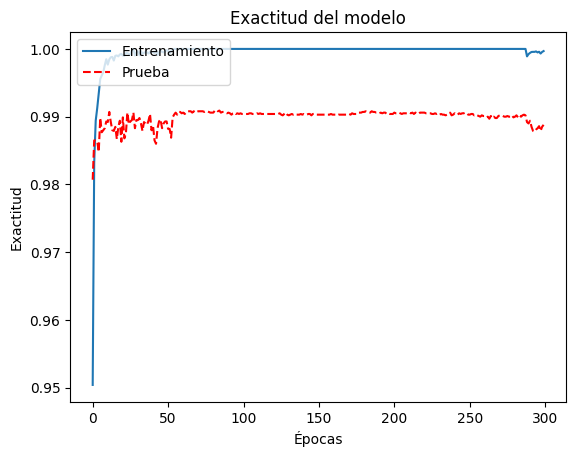

In [14]:
#hacer las graficas
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], 'r--')
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento','Prueba'], loc='upper left')
plt.show
plt.savefig('figura01.png', dpi=300)

<function matplotlib.pyplot.show(close=None, block=None)>

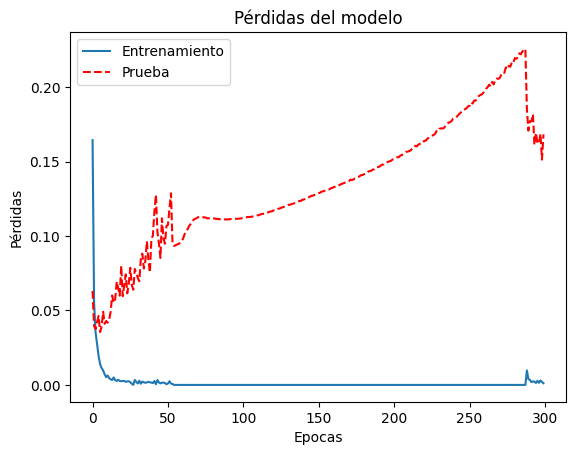

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')
plt.title('Pérdidas del modelo')
plt.ylabel('Pérdidas')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento','Prueba'], loc='upper left')
plt.show


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 16)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         230,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 695,780 (2.65 MB)

 Trainable params: 231,926 (905.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 463,854 (1.77 MB)

**Conv2D:**Aplica 16 filtros de 5x5, reduce la imagen de 28x28 a 24x24. Tiene 416 parámetros porque cada filtro tiene (5x5) + bias *16.
**MaxPooling2D:**
Reduce el tamaño a la mitad (24 a 12), sin cambiar los filtros. No tiene parámetros porque solo reduce datos.
**Flatten:** Convierte la imagen en un vector de 2304 valores. No tiene parámetros.
**Dense**: Cada neurona recibe 2304 conexiones, por eso tiene 230,500 parámetros.
**Dense_1:** Conecta las 100 neuronas anteriores con 10 clases. Tiene 1,010 parámetros.
